# TP 1 - Modélisation d'un générateur basse fréquence

> **Objectifs**
> 
>  * Mesures de tensions et de résistances réalisées au multimètre.
>  * Mettre en application les méthodes vues en MPSI/MP2I et décrites dans les rappels de métrologie : 
>      - évaluations de type B d'incertitudes-types ; 
>      - évaluations d'incertitudes-types composées ;
>      - comparaison des estimations d'une même grandeur avec l'écart normalisé ;
>      - réalisation d'une régression linéaire ;
>      - écriture du résultat d'une mesure de manière adaptée.
>

*Commencer par enregistrer votre Notebook* 

Les programmes sont rédigés en langage python. Excuter la cellule suivante pour réaliser les importations.

In [1]:
#%% Cellule n°1 : importations

import numpy as np
from matplotlib import pyplot as plt
import statistics

## Modèle de Thévenin

Un générateur basse fréquence est souvent modélisé par un générateur linéaire (représenté ci-dessous), constitué de l’association en
série d’un générateur idéal de tension de f.e.m. $e(t)$ et d’une résistance de sortie notée $r_s$ dans la suite.

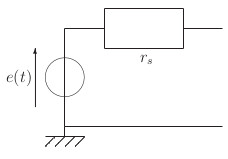

> **Problématique** : estimer expérimentalement $r_s$ et la valeur efficace $E_{eff}$ de $e(t)$ pour un générateur basse fréquence usuel.

Le dispositif de mesure est représenté ci-dessous : il sera obtenu en branchant la boîte de résistances et le multimètre sur la sortie du GBF. L’ouverture du circuit à la hauteur de l’interrupteur K est réalisé en débranchant un des fils connecté à la boîte de résistances.

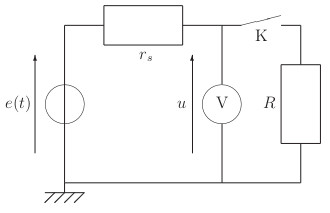

Dans l’ensemble du TP, l’impédance d’entrée du voltmètre est supposée infinie de sorte que le courant le traversant est nul.

> **Préparation**
>
> Etablir les expressions suivantes de $u(t)$ :
> * en circuit ouvert
$$u(t)=e(t) \ ; $$

> * en circuit fermé
$$u(t)=\frac{R}{R+r_s}e(t)\ .$$

> En quoi le dispositif permet-il d'accéder à $E_{eff}$ et $r_s$ ?

<u>Réponses</u>

    
En circuit ouvert, $u=e-r_si$, mais comme $i\simeq 0$, alors $u=e$ et $U_{eff}=E_{eff}$.
    
En circuit fermé, d'après la relation du pont diviseur de tension, 
$$u(t)=\frac{R}{R+r_s}e(t)\ .$$
    
Par conséquent, une seconde mesure de la valeur efficace de $u(t)$ conduit à 
$$U_{eff}=\frac{R}{R+r_s}E_{eff}\ ,$$
qui s'inverse en :
$$r_s=R\left(\frac{E_{eff}}{U_{eff}}-1\right)\ .$$    

## Premières manipulations

Régler le générateur basse fréquence de manière à délivrer une tension sinusoïdale $e(t)$ de valeur efficace (RMS) $E_{eff}=$ 1,8 V et de fréquence 50 Hz, sans terme constant.

> 1. Déterminer expérimentalement la tension $E_{eff}$ et son incertitude-type $u(E_{eff})$ à l’aide de la notice fournie. Ecrire le résultat sous forme normalisée et commenter.

On trouve $E_{eff} =1,813\mbox{ V}$ ; $u(E_{eff}) =0,018\mbox{ V}$ .

> 2. Pour les valeurs données dans le tableau ci-dessous, 
>    |||||||||||
>    |:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
>    |$R$ (en $\Omega$) |20|30|40|50|60|70|80|90|100|
>
>    mesurer la résistance de la boîte de résistance <u>sur le même calibre 200 Ω</u> de l'ohmmètre et compléter la cellule suivante avec les valeurs de $R$ dans le tableau numpy et la formule permettant de calculer $u(R)$ dans la fonction **u1**. 
>
>    Exécuter alors la cellule.

In [2]:
#%% Cellule n°2: incertitude u(R)

tab_R=np.array([19.3,29.2,39.1,49.0,58.9,68.8,78.6,88.4,98.3])# Valeurs de R à saisir en ohm

def u1(R):
    return (0.01*R + 0.4)/(3**0.5)  #Saisir la formule de calcul des incertitudes

tab_uR=u1(tab_R)         #Calcul des incertitudes pour toutes les valeurs de R  
print('Incertitude pour R=50 ohm :', tab_uR[3],' ohm.')

Incertitude pour R=50 ohm : 0.513841739578767  ohm.


> 3. Ecrire le résultat de la mesure de la résistance de $50\ \Omega$ sous forme normalisée : 

$$R = 49,00\mbox{ $\Omega$}\ ;\ u(R) =0,51\mbox{ $\Omega$}$$


## Première estimation de $r_s$

> 3. Constituer le montage expérimental avec $R=50\mbox{ $\Omega$}$.

> 4. Mesurer la tension $U_{eff}$ au voltmètre et estimer son incertitude $u(U_{eff})$ avec la notice.

On trouve $U_{eff} =0,903\mbox{ V}$ ; $u(U_{eff}) =0,010\mbox{ V}$.

> 5. En exploitant la préparation, estimer la valeur de $r_s$ .

On trouve $r_s=49,38\ \Omega$.

La relation exprimant $r_s$ en fonction de $E_{eff}$ ne permet pas de calculer simplement $u(r_s)$. On utilise alors une simulation de type Monte Carlo pour estimer cette incertitude.

6. Compléter alors les fonction **u2** et **u3** dans la cellule suivante afin de d’obtenir $u(r_s)$. La fonction **u2** est l’équivalent de **u1** pour les tensions. La fonction **u3** prend comme paramètre $U$, $R$, $E$ et renvoie le tableau *tab_rs* des valeurs de $r_s$,
ainsi que sa moyenne *mrs* et son écart-type *ers*.
Toutes les grandeurs mesurées seront assimilées à des variables aléatoires normales. On utilisera les fonctions suivantes :

* **np.random.normal(m,s)** qui reçoit comme paramètre la valeur moyenne 
*m* et l’écart-type *s* de la distribution de probabilité et retourne une valeur aléatoire ;
* **statistics.mean(x)** qui prend comme paramètre un tableau de valeurs et en retourne la valeur moyenne ;
* **statistics.pstdev(x)** qui prend comme paramètre un tableau de valeurs et en retourne l’écart-type.

    Exécuter alors la cellule.

In [3]:
#%% Cellule n°3 : première estimation de u(rs)
 
def u2(V):
    return (0.015*V+0.001)/(3**0.5)  #Saisir la formule de calcul des incertitudes

def u3(U,E,R):
    uU, uE, uR = u2(U), u2(E), u1(R) #Calcul des incertitudes des différentes grandeurs mesurées
    N=5000                           #Nombre de valeurs de rs estimées   
    tab_rs=np.zeros(N)               #Définition du tableau numpy
    for i in range(N) :              #Rédiger ici la suite de la fonction
        Ui=np.random.normal(U,uU)
        Ei=np.random.normal(E,uE)
        Ri=np.random.normal(R,uR)
        tab_rs[i]=(Ei/Ui-1)*Ri    
    mrs=statistics.mean(tab_rs)     #Calcul de la valeur moyenne de rs
    ers=statistics.pstdev(tab_rs)   #Calcul de l'écart-type sur rs
    return tab_rs, mrs,ers

tab,rs,urs =u3(0.9,1.8,50)          #Appel de la fonction u3 avec les valeurs mesurées
plt.figure()
plt.title(r'$r_s=$'+str(rs)[0:6]+' $\Omega\qquad u(r_s)=$'+str(urs)[0:6]+' $\Omega$')
plt.hist(tab,bins=41, density=True) #Affichage des résultats sous la forme d'histogrammes.
plt.show()


> 7. Ecrire les résultats sous forme normalisée 

$$r_s = 50,0\mbox{ $\Omega$}\ ;\ u(r_s) =1,4\mbox{ $\Omega$}$$

> 8. Comparer avec l'estimation précédente en calculant l'écart normalisé et commenter.

On obtient :
$$Z=\frac{50,0-49,4}{1,4}=0,4$$
Les deux mesures sont compatibles l'une avec l'autre.

## Exploitation d’une régression linéaire

### Estimation de $r_s$

>9. Pour chacune des valeurs de $R$ du tableau précédent, mesurer $U_{ef f}$ au voltmètre en restant <u>sur le même calibre 2 V</u>.

>10. Compléter la cellule suivante en remplissant le tableau *abs_Ueff* de valeur de $U_{eff}$ et en affectant sa valeur à la variable *E_eff*.
>
>    Exécuter la cellule, ce qui permet de représenter $R$ en fonction de $\frac{U_{eff}}{E_{eff}-U_{eff}}$.

In [4]:
#%% Cellule n°4 : représentation graphique de R en fonction de Ueff/(Eeff-Ueff)

tab_Ueff=np.array([0.502,0.665,0.793,0.895,0.978,1.047,1.106,1.156,1.2])# Valeurs de Ueff en V à saisir
Eeff=1.808                                                      # Valeur de Eeff en V à saisir

tab_uUeff=u2(tab_Ueff)                                        # Calcul des incertitudes sur Ueff
uEeff=u2(Eeff)                                                # Calcul de l'incertitudes sur Eeff

def Abscisses(E,tab_U):                                       # Calcul du tableau de valeurs des abscisses
    return tab_U/(E-tab_U)

tab_absc=Abscisses(Eeff,tab_Ueff)                             # Appel de la fontion précédente

plt.figure()
plt.ylabel(r'$R$ en $\Omega$')
plt.xlabel(r'$U_{eff}/(E_{eff}-U_{eff})$')
plt.axis([0, 2.5, -0.05, 110]);
plt.errorbar(tab_absc, tab_R, xerr = 0, yerr = tab_uR,fmt='o', linestyle='none',color = 'b', label = 'Points expérimentaux' )
plt.show()  

> 11. En quoi une régression linéaire permet d’estimer $r_s$ ? Commenter la représentation obtenue.


Comme la valeur de l’ordonnée à l’origine est imposée par le modèle, il n’est pas possible d’utiliser la fonction **np.polyfit** pour réaliser la régression linéaire. Si on applique la méthode des moindres carrés à un ensemble de points ($y_k$, $x_k$) que l’on essaie d’ajuster par une droite de la forme $y = ax$, on doit minimiser la somme
$$S =\sum^{N}_{k=1}(y_k-ax_k)^2\ .$$
On cherche alors la valeur de $a$ qui annule
$$\frac{\mbox{d} S}{\mbox{d} a}=\sum^{N}_{k=1}2(y_k-ax_k)(-x_k)=2\left(a\sum^{N}_{k=1}x_k^2-\sum^{N}_{k=1}x_ky_k\right)\ ,$$
ce qui conduit à
$$a=\frac{\sum^{N}_{k=1}x_ky_k}{\sum^{N}_{k=1}x_k^2}\ .$$

9. Compléter la cellule suivante en achevant la fonction **regression** qui reçoit les tableaux numpy en abscisses et en ordonnés et retourne la pente du meilleur modèle linéaire. Calculer alors les résidus.

   Pour l’ensemble de ces calculs, privilégier les opérations sur les tableaux numpy et utiliser la fonction **np.sum** qui effectue la somme des éléments d’un tableau.

   Exécuter la cellule pour représenter les résidus. 

In [5]:
#%% Cellule n°5 : régression linéaire et résidus

def regression(tab_X,tab_Y):                                  # Fonction à compléter
    a=np.sum(tab_X*tab_Y)/np.sum(tab_X*tab_X)
    return a

rs=regression(tab_absc,tab_R)                                 # Appel de la fontion précédente
tab_residus=tab_R-rs*tab_absc                                 # Formule du calcul des résidus 

plt.figure()
plt.title(r'$r_s=$'+str(rs)[0:6]+' $\Omega$')
plt.ylabel(r'Résidus en $\Omega$')
plt.xlabel(r'$U_{eff}/(E_{eff}-U_{eff})$')
plt.errorbar(tab_absc, tab_residus, xerr = 0, yerr = tab_uR, fmt='o', linestyle='none',color = 'r')
plt.show()                                                    # Affichage du graphe.



> 10. Commenter.


On trouve $r_s =$ 49,91 Ω. Les résidus sont distribués aléatoirement, mais semblent
un peu faibles. Incertitudes surestimées ?

> 11. Compléter la cellule suivante en calculant les écarts normalisés, puis l’exécuter pour représenter ces écarts normalisés. 

In [6]:
#%% Cellule n°6 : régression linéaire et écarts normalisés

tab_EcartsNormalises=tab_residus/tab_uR                       # Formule du calcul des écarts normalisés 

plt.figure()
plt.ylabel(r'Ecarts normalisés')
plt.xlabel(r'$U_{eff}/(E_{eff}-U_{eff})$')
plt.axis([0, 2.5, -3, +3]);
x=np.arange(0,2.5,0.01)    
plt.errorbar(tab_absc, tab_EcartsNormalises, fmt='o', linestyle='none',color = 'b')# Tracé des écarts normalisés
x=np.arange(0,2.5,0.01)     
plt.fill_between(x, 2,-2, color='0.9')                          
plt.show()   

> 12. Commenter.

Distribution pas aléatoire + sous estimation des incertitudes : la formule de l'incertitude donnée dans le notice
majore probablement les incertitudes-types.

Remarquons qu'il n’est pas nécessaire de représenter à la fois les résidus et les écarts nomalisés.

### Estimation de $u(r_s)$

La régression ne permet pas d’estimer l’incertitude $u(r_s)$. De plus, les incertitudes sur $E_{eff}$ et $U_{eff}$ n’ont pas été prises en compte. On réalise alors $N$ simulations Monte Carlo d’estimations de $r _s$

Dans la cellule suivante, la calcul de l'incertitude-type $u(r_s)$ est mené par la fonction de **incertitudes-Regression** qui prend comme paramètres le tableau de valeurs de $U_{eff}$, la valeur de $E_{eff}$ et le tableau de valeurs de $R$, et qui renvoie le tableau *tab_rs* des valeurs de $r_s$, ainsi que sa moyenne *mrs* et son écart-type *ers*. Elle s’inspire de la fonction **u3** et appelle les fonctions **Abscisses** et **regression**.

> 13. Exécuter la cellule. 

In [7]:
#%% Cellule n° 7 : régression linéaire et incertitudes

def incertitudeRegression(tab_U,E,tab_R):                     # Fonction à compléter
    tab_uU, uE, tab_uR = u2(tab_U), u2(E), u1(tab_R)          # Calcul des incertitudes des différentes grandeurs mesurées
    N=50000                                                   # Nombre de valeurs de rs estimées  
    tab_rs=np.zeros(N)                                        # Initialisation du tableau des valeurs de rs
    for i in range(N) :                                       # Rédiger ici la suite de la fonction
        Ui=np.random.normal(tab_U,tab_uU)
        Ei=np.random.normal(E,uE)
        Ri=np.random.normal(tab_R,tab_uR)
        Xi=Abscisses(Ei,Ui)
        tab_rs[i]=regression(Xi,Ri)
    mrs=statistics.mean(tab_rs)
    ers=statistics.pstdev(tab_rs)
    return tab_rs, mrs,ers

tab,rs,urs =incertitudeRegression(tab_Ueff,Eeff,tab_R)
plt.figure()
plt.title(r'$r_s=$'+str(rs)[0:6]+' $\Omega\qquad u(r_s)=$'+str(urs)[0:6]+' $\Omega$')
plt.hist(tab,bins=41, density=True)
plt.show()                                                    # Affichage du graphe.


> 14. Ecrire les résultats sous forme normalisée et comparer aux résultats du 7.

On obtient
$r_s =$ 49,9 ohm ;
$u'(r_s) =$ 1,3 ohm.

On calcule ensuite l’écart normalisé
$$\frac{\Delta r_s}{\sqrt{u(r_s)^2 + u'(r_s)^2}}= 0,02$$
et on en conclut que les mesures sont cohérentes, la seconde donnant une incertitude plus faible.

> 15. Question subsidaire : trouver dans la notice la résistance d’entrée du voltmètre et montrer qu’elle ne perturbe pas les mesures.

Dans la notice, on trouve que l'impédance d'entrée du voltmètre est $R_e=10$ M$\Omega$. 

Dès lors, la mesure en circuit ouvert ne donne pas accès à $E_{eff}$, mais à 
$$\frac{R_e}{R_e+r_s}E_{eff}=\frac{1}{1+r_s/R_e}E_{eff}\simeq \left(1-\frac{r_s}{R_e}\right)E_{eff}\ ,$$
soit un écart relatif de l'ordre de $r_s/R_e\sim 5.10^{-6}$ complétement négligeable compte-tenu des incertitudes.

De même, en circuit fermé, $u(t)$ est la tension aux bornes de l'assciation en parallèle de $R$ et de $R_e$, c'est-à-dire
$$R_{eq}=\frac{RR_e}{R+R_e}=R\frac{1}{1+R/R_e}\simeq \left(1-\frac{R}{R_e}\right)R\ ,$$
soit encore un écart relatif de l'ordre de $R/R_e$, soit $10^{-5}$ au mieux, toujours complétement négligeable compte-tenu des incertitudes.

